## Imports and Data Loading

In [1206]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [1207]:

data = pd.read_csv('../Data/kc_house_data.csv')
data.head(4)



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000


## Exploratory data analysis

In [1208]:
data.shape

(21597, 21)

In [1209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are 21 columns and 25,597 rows

In [1210]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

These are the columns and their descriptions: 
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

A data description of the numerical columns

In [1211]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleaning

### Checking for duplicates

In [1212]:
data.duplicated().sum()

0

There are no duplicates

### Looking for null values

In [1213]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The waterfront, view, and year renovated columns have null values<br>
    
- waterfront, view, yr_renovated: 2376, 63, 3842 missing values respectively<br>
- is,date, price, bedrooms, sqft_living, sqft_lot, floors, condition, grade, sqft_above, sqft_basement, yr_built, zipcode, lat, long, sqft_living15, sq_lot15: No missing values.<br>

In [1214]:
# We will fill null values in the waterfront and view columns with the mode since these are categorical,
# We will also convert them to the string datatype, which works for categorical data

# and for the year renovated, fill with the median since there are possibly outliers
data['view'] = data['view'].astype(str)
data['waterfront'] = data['waterfront'].astype(str)

wf_mode = data.waterfront.mode()
view_mode = data.view.mode()
median_year = data.yr_renovated.median()

data.waterfront.fillna(wf_mode, inplace = True)
data.view.fillna(view_mode, inplace = True)
data.yr_renovated.fillna(median_year, inplace = True)

In [1215]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are now no null values

## Data Analysis

#### Pairplot
We will create a pairplot to visualize the relationship between the columns

In [1216]:
# sns.pairplot(data);

#### Correlation Heatmap
A correlation heatmap to obtain numbers for an easier reading of the correlation

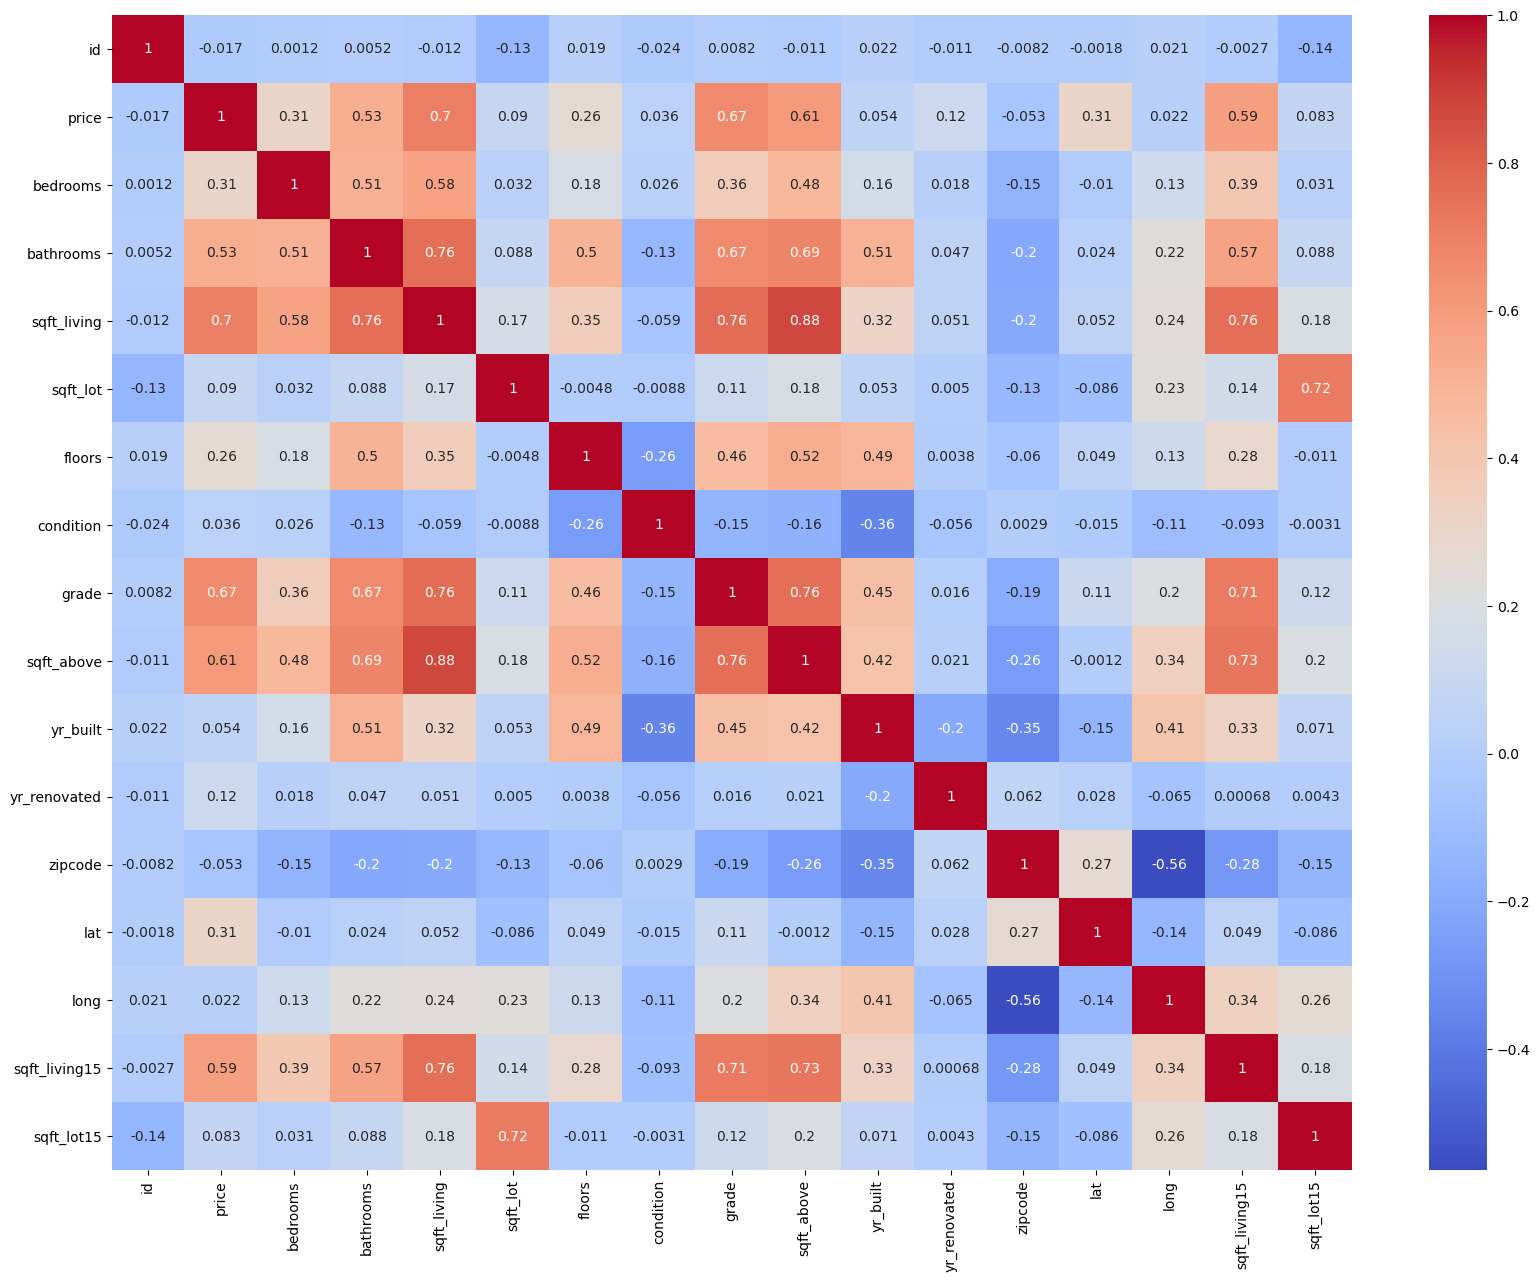

In [1217]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),cmap="coolwarm",annot=True);

We have already determined that our predicted column is price, and will, therefore, be looking at the correlation of the rest of the columns with price<br>
Choose the features that have the highest collinearity with the price. These are:<br>
- Bathrooms
- sqft_living
- grade
- sqft_above
- sqft_living15

Based on the correlation coefficients with price from the KC Housing Data dataset, the most important features are:

    Bathrooms- Number of bathrooms
        Justification: Bathrooms RM has a strong positive correlation with price (0.53). This indicates that as the number of bathrooms in a home in increases, its price tends to increase as well.
        

    sqft_living - Footage of the home
        Justification: sqft_living has a very strong positive correlation with price (0.7). This indicates that as the square footage of the home increases, its price increases.

    grade - overall grade given to the housing unit, based on King County grading system
        Justification: Grade has a strong positive correlation with price (0.67). This indicates that as the grade of the home increases, its price increases.

    sqft_above - square footage of house apart from basement
        Justification: sqft_above has a strong correlation with price (0.61). This indicates that as the square footage of house apart from basement increase, its price increases.

    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
        Justification: sqft_living 15 has a strong correlation with price (0.59). This indicates that as the square footage of interior housing living space for the nearest 15 neighbors increases, the home's price increases.


### Checking the correlations for the selected important features
Create a pairplot with a regression line to show the best fit line

In [1218]:
data2 = data[['bathrooms','sqft_living','grade','sqft_above','sqft_living15', 'price']]
data2

,bathrooms,sqft_living,grade,sqft_above,sqft_living15,price
0,1.00,1180,7,1180,1340,221900.0
1,2.25,2570,7,2170,1690,538000.0
2,1.00,770,6,770,2720,180000.0
3,3.00,1960,7,1050,1360,604000.0
4,2.00,1680,8,1680,1800,510000.0
...,...,...,...,...,...,...
21592,2.50,1530,8,1530,1530,360000.0
21593,2.50,2310,8,2310,1830,400000.0
21594,0.75,1020,7,1020,1020,402101.0
21595,2.50,1600,8,1600,1410,400000.0


In [1219]:

# sns.pairplot(data2, kind = "reg");


Check for outliers

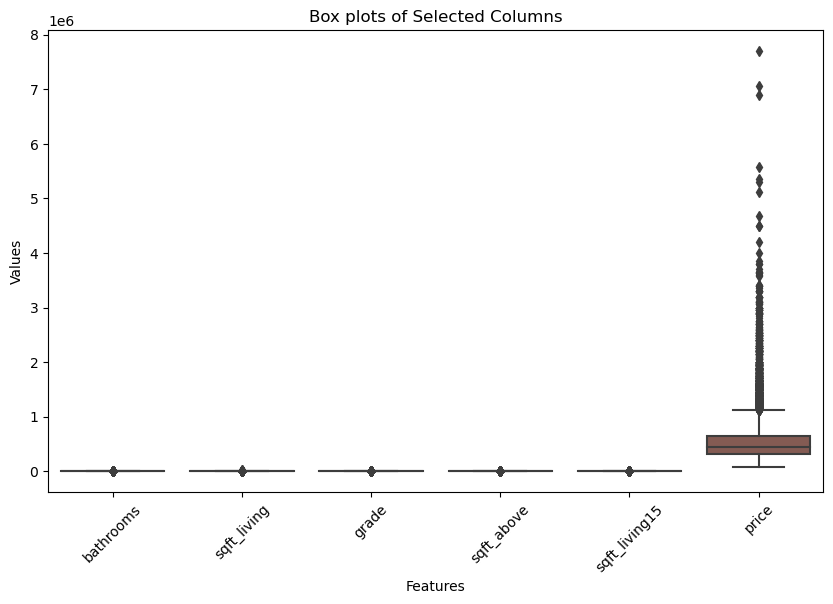

In [1220]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data = data2)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show();

The predictors do not seem to have outliers that could have a major impact on the price.<br>
Based on the box plots, the price is what seems to have a lot of outliers, which is good since it gives a proper representation of the market.

### Analysis 1: What is the relationship between bathrooms and price?

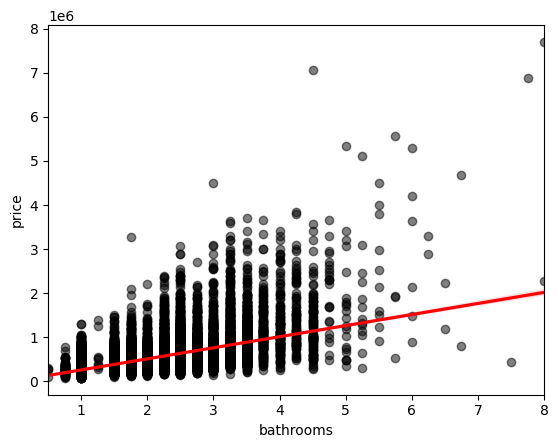

In [1221]:
sns.regplot(x = data2['bathrooms'], y = data2['price'],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"});

**Trend Observation:**

 In the scatter plot with a regression line of bathrooms (number of bathrooms in house) against price, you can observe a positive trend. As the average number of bathrooms increases, the price of the house tends to increase as well.
 
**Implication:**

 This suggests that houses with more bathrooms generally have higher prices in the King County housing market. They are priced higher.

### Analysis 2: What is the Relationship between sqft_living and price?

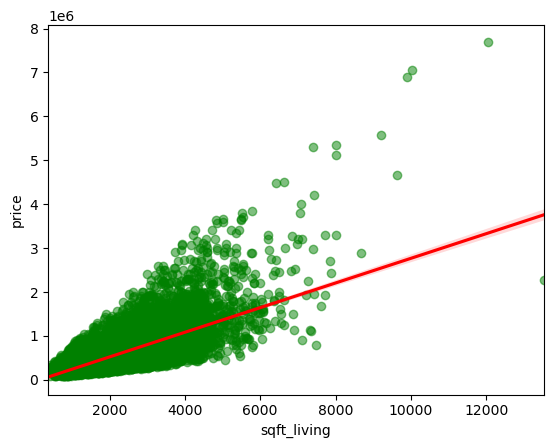

In [1222]:
sns.regplot(x = data2['sqft_living'], y = data2['price'],
            scatter_kws = {"color": "green", "alpha": 0.5},
            line_kws = {"color": "red"});

**Trend Observation:**

 In the scatter plot with a regression line of square footage of the home (sqft_living) against price, you can observe a positive trend. As the average square footage of the home increases, the price of the house tends to increase as well.
 
**Implication:**

 This suggests that houses with a higher square footage have higher prices in the King County housing market. They are priced higher.

### Analysis 3: What is the relationship between Grade and Price

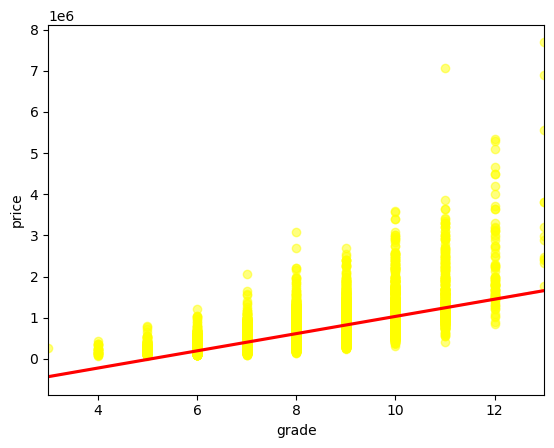

In [1223]:
sns.regplot(x = data2['grade'], y = data2['price'],
            scatter_kws = {"color": "yellow", "alpha": 0.5},
            line_kws = {"color": "red"});

**Trend Observation:**

 In the scatter plot with a regression line of grade (overall grade given to the housing unit, based on King County grading system) against price, you can observe a positive trend. As the grade given to the home increases, the price of the house tends to increase as well.
 
**Implication:**

 This suggests that houses with a higher grade have higher prices in the King County housing market. They are priced higher.

## Modeling - Feature Selection

First create the first iteration of our linear model with all the selected features

In [1224]:
# Create a model to test using all the selected features
from statsmodels.formula.api import ols


formula = 'price ~ bathrooms + sqft_living + grade + sqft_above + sqft_living15'
model = ols(formula, data2).fit()
model_summary = model.summary()

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5161.
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:16:22   Log-Likelihood:            -2.9890e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -6.52e+05   1.36e+04    -48.079      0.000   -6.79e+05   -6.25e+05
bathrooms     -3.567e+04   3440.363    -10.369      0.000   -4.24e+04   -2.89e+04
sqft_living     245.5631      4.528     54.238      0.000     236.689     254.437
grade          1.119e+05   2470.776     45.293      0.000    1.07e+05    1.17e+05
sqft_above      -80.6961      4.458    -18.101      0.000     -89.434     -71.958
sqft_living15    22.2598      4.032      5.520      0.000      14.356      30.164
==============================================================================
Omnibus:                    17251.912   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128620.760
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      37.771   Cond. No.                     2.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1225]:
# Check for multicollinearity
predictors_data2 = data2[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
predictors_data2.corr()


,bathrooms,sqft_living,grade,sqft_above,sqft_living15
bathrooms,1.000000,0.755758,0.665838,0.686668,0.569884
sqft_living,0.755758,1.000000,0.762779,0.876448,0.756402
grade,0.665838,0.762779,1.000000,0.756073,0.713867
sqft_above,0.686668,0.876448,0.756073,1.000000,0.731767
sqft_living15,0.569884,0.756402,0.713867,0.731767,1.000000


In [1226]:
abs(predictors_data2.corr()) > 0.75

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
bathrooms,True,True,False,False,False
sqft_living,True,True,True,True,True
grade,False,True,True,True,False
sqft_above,False,True,True,True,False
sqft_living15,False,True,False,False,True


Sqft_living seems to have very strong correlation with all the other predictors, so we will drop it and see the impact on our model

In [1227]:
# Create a second model after dropping sqft_living from the 
from statsmodels.formula.api import ols



formula2_without_sqft_living = 'price ~ bathrooms + grade + sqft_above + sqft_living15'
model2_without_sqft_living = ols(formula2_without_sqft_living, data2 ).fit()
model2_summary_without_sqft_living = model2_without_sqft_living.summary()

model2_summary_without_sqft_living

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     5030.
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:16:22   Log-Likelihood:            -3.0028e+05
No. Observations:               21597   AIC:                         6.006e+05
Df Residuals:                   21592   BIC:                         6.006e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.819e+05   1.42e+04    -54.962      0.000    -8.1e+05   -7.54e+05
bathrooms      3.627e+04   3383.637     10.720      0.000    2.96e+04    4.29e+04
grade          1.274e+05   2615.981     48.705      0.000    1.22e+05    1.33e+05
sqft_above       58.8061      3.881     15.151      0.000      51.199      66.414
sqft_living15    82.8561      4.130     20.062      0.000      74.761      90.951
==============================================================================
Omnibus:                    19141.980   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1752289.555
Skew:                           3.866   Prob(JB):                         0.00
Kurtosis:                      46.445   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This actually lowers the R Squared value (0.544 versus 0.482), so dropping the sqft_living column does not improve the model

Let's drop the sqft_living15 column from the original model since it has a strong collinearity with multiple columns and see the impact that it has on the model

In [1228]:
# Create a second model after dropping sqft_living15 from the 
from statsmodels.formula.api import ols


formula2_without_sqft_living15 = 'price ~ bathrooms + sqft_living + grade + sqft_above'
model2_without_sqft_living15 = ols(formula2_without_sqft_living15, data2).fit()
model2_summary_without_sqft_living15 = model2_without_sqft_living15.summary()

model2_summary_without_sqft_living15

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6434.
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:16:23   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.554e+05   1.36e+04    -48.353      0.000   -6.82e+05   -6.29e+05
bathrooms   -3.723e+04   3431.175    -10.849      0.000    -4.4e+04   -3.05e+04
sqft_living   252.4879      4.353     58.000      0.000     243.955     261.021
grade        1.159e+05   2366.154     48.968      0.000    1.11e+05    1.21e+05
sqft_above    -77.1922      4.416    -17.482      0.000     -85.847     -68.537
==============================================================================
Omnibus:                    17067.412   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1065708.366
Skew:                           3.319   Prob(JB):                         0.00
Kurtosis:                      36.767   Cond. No.                     2.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R squared value is the same as the first model, meaning that sqft_living15 did not actually contribute to the model. We can leave it as is.
Next, let's try removing sqft_above from the model since it also has relationships with multiple columns

In [1229]:
# Create a second model after dropping sqft_living15 from the 
from statsmodels.formula.api import ols


formula2_without_sqft_above = 'price ~ bathrooms + sqft_living + grade'
model2_without_sqft_above = ols(formula2_without_sqft_above, data2).fit()
model2_summary_without_sqft_above = model2_without_sqft_above.summary()

model2_summary_without_sqft_above

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     8359.
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:16:23   Log-Likelihood:            -2.9907e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21593   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.024e+05   1.33e+04    -45.279      0.000   -6.28e+05   -5.76e+05
bathrooms   -3.836e+04   3454.677    -11.103      0.000   -4.51e+04   -3.16e+04
sqft_living   203.1650      3.339     60.855      0.000     196.621     209.709
grade        1.046e+05   2293.086     45.626      0.000       1e+05    1.09e+05
==============================================================================
Omnibus:                    16926.041   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008526.554
Skew:                           3.291   Prob(JB):                         0.00
Kurtosis:                      35.824   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This also does not have a major impact on our relationship (0.544 versus 0.537 R squared values), so we can omit. 

In [1230]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
predictors_for_feature_ranking = data2[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(predictors_for_feature_ranking, data2['price'])

# Calling the .support_ attribute tells you which variables are selected

selector.support_ 

# Calling .ranking_ shows the ranking of the features, selected features are assigned rank 1

selector.ranking_

array([1, 1, 1, 2, 3])

This validates our selection of bathrooms, sft_living, and grade as the most important features since they were ranked as best with the ranking of 1. sqft_above and sqft_living have rankings of 2 and 3 respectively. So, this validates the fact that we discarded them.

### Final Model- First Iteration

The selected features are: 
Bathrooms, sqft_living, and grade

In [1231]:
data2 = data2.drop(columns = ['sqft_above', 'sqft_living15'], axis = 1)
data2.head()

,bathrooms,sqft_living,grade,price
0,1.00,1180,7,221900.0
1,2.25,2570,7,538000.0
2,1.00,770,6,180000.0
3,3.00,1960,7,604000.0
4,2.00,1680,8,510000.0


Let's see whether the selected columns are categorical and deal with them

In [1232]:
print("Number of unique values in bathrooms column:", data2['bathrooms'].nunique())
print("Number of unique values in sqft_living column:", data2['sqft_living'].nunique())
print("Number of unique values in grade column:", data2['grade'].nunique())


Number of unique values in bathrooms column: 29
Number of unique values in sqft_living column: 1034
Number of unique values in grade column: 11


In [1233]:
print(data2['bathrooms']is pd.CategoricalDtype)
print(data2['sqft_living']is pd.CategoricalDtype)
print(data2['grade']is pd.CategoricalDtype)

False
False
False


In [1234]:
# Get the list of all categorical columns
data2.select_dtypes(include=['object']).columns.tolist()

[]

There are no categorical columns

In [1235]:
data2.select_dtypes(exclude=['object']).columns.tolist()

['bathrooms', 'sqft_living', 'grade', 'price']

All the columns are numerical

In [1236]:
data2._get_numeric_data().head()

,bathrooms,sqft_living,grade,price
0,1.00,1180,7,221900.0
1,2.25,2570,7,538000.0
2,1.00,770,6,180000.0
3,3.00,1960,7,604000.0
4,2.00,1680,8,510000.0


All the columns are numeric

Using all three methods above, we can see that none of the predictors are categorical, and we, therefore, do not have to deal with them 

In [1237]:
x = data2[['bathrooms', 'sqft_living', 'grade']]
x.head()

,bathrooms,sqft_living,grade
0,1.00,1180,7
1,2.25,2570,7
2,1.00,770,6
3,3.00,1960,7
4,2.00,1680,8


In [1238]:
y = data2['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

### Test Train Split

In [1239]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=42)

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
#IMPORTANT NOTES!!!!!!!!!
# train data with fit transform 
# test data with test data
# We only scale our predictors, we don't scale the predicted value
x_test_scaled = scaler.transform(x_test)


# Modeling
model = LinearRegression()
# Training the model
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
data_after_test_training = pd.DataFrame({"true":y_test,"pred":y_pred})
data_after_test_training.head()

,true,pred
3686,132500.0,165305.860046
10247,415000.0,289304.819885
4037,494000.0,407057.879160
3437,355000.0,303327.701085
19291,606000.0,394192.983226


### Validation

In [1240]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)


y_hat_train = model.predict(x_train_scaled)
y_hat_test = model.predict(x_test_scaled)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('Difference between Train and Test MSE is:', (train_mse/test_mse-1).round(3)*100,'%)')


mse 61048667496.09867
mae 161628.345898995
R2 0.5311748466249215
Train Mean Squared Error: 62794624746.37335
Test Mean Squared Error: 61048667496.09867
Difference between Train and Test MSE is: 2.9000000000000004 %)


The R squared value from the first iteration of our model shows that our model is accurate 53.11% of the time
A mean absolute error of 161628 shows the predicted value is 161628 points away from the actual value. Our training and test MSE exhibit a very small difference (2.9%). This is a sign that the model generalizes well to future cases.

These are not ideal conditions for the model we want to eventually have, let's make some iterations.

### Final Model- Second Iteration
Let us change the ratio of our test-train data (from 80-20 to 66-33) and see whether this improves our model

In [1241]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
#IMPORTANT NOTES!!!!!!!!!
# train data with fit transform 
# test data with test data
# We only scale our predictors, we don't scale the predicted value
x_test_scaled = scaler.transform(x_test)
# Modeling
model = LinearRegression()
# Training the model
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
data_after_test_training = pd.DataFrame({"true":y_test,"pred":y_pred})
data_after_test_training.head()

,true,pred
3686,132500.0,164746.383818
10247,415000.0,286457.299637
4037,494000.0,407895.728169
3437,355000.0,304803.668107
19291,606000.0,392380.599492


### Validation

In [1242]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

y_hat_train = model.predict(x_train_scaled)
y_hat_test = model.predict(x_test_scaled)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('Difference between Train and Test MSE is:', (train_mse/test_mse-1).round(3)*100,'%)')

mse 62009541655.03987
mae 161609.34538598044
R2 0.5323509874463058
Train Mean Squared Error: 62642802802.33004
Test Mean Squared Error: 62009541655.03987
Difference between Train and Test MSE is: 1.0 %)


The R squared value from the second iteration of our model shows that our model is accurate 53.23% of the time based on the test data.<br>
A mean absolute error of 161609 shows the predicted value is 161609 points away from the actual value, based on the test data.<br> However, the difference between the train and test mean squared error is now very little (1%). This indicates that we are not overfitting. This is a large improvement on our model and we will take it.

Now let's get our model's summary to get values like the p-values of the predictors, f-statistic and its probability, R squared, and coefficients..

### Model Summary

In [1243]:
import statsmodels.api as sm

# Add a constant to the model (for the intercept)
x_train_sm = sm.add_constant(x_train)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, x_train_sm).fit()

# Print the model summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     5895.
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:16:23   Log-Likelihood:            -2.0936e+05
No. Observations:               15117   AIC:                         4.187e+05
Df Residuals:                   15113   BIC:                         4.188e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.251e+05    1.6e+04    -39.181      

***Model Summary Interpretation***<br> R-squared: 0.539 This means that approximately 53.9% of the variability in the house prices can be explained by the model.<br>

Adjusted R-squared:  We will create another model less one identified predictor to see how this impacts the model and whether it performs better. If the model performs better, we need to drop this variable or decide that it is not one of the most important ones.<br>

F-statistic and its p-value: F-statistic: 5895, Prob (F-statistic): 0.00 The very low p-value suggests that the overall model is statistically significant, meaning that at least one of the predictors is significantly related to the dependent variable (house prices).<br>

Coefficients:<br>

Each row represents a predictor in the model with its coefficient, standard error, t-value, and p-value. For instance, the coefficient for sqft_living is 197.0231, meaning that for each additional square foot of living space, the house price increases by approximately $197.0231, holding other variables constant. The p-values for all predictors are less than 0.05, indicating that they are statistically significant.<br>

Let's use feature ranking with recursive elimination to select only two variables for our model.

In [1244]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
predictors_for_feature_ranking2 = data2[['bathrooms', 'sqft_living', 'grade']]
selector2 = RFE(linreg, n_features_to_select=2)
selector2 = selector.fit(predictors_for_feature_ranking2, data2['price'])

# Calling the .support_ attribute tells you which variables are selected

selector.support_ 

# Calling .ranking_ shows the ranking of the features, selected features are assigned rank 1

selector.ranking_

array([1, 1, 1])

All the predictors still have the same ranking of 1

In [1245]:
import pandas as pd
import statsmodels.api as sm

def stepwise_selection(x, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out=0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        x - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(x.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
    return included

result = stepwise_selection(x, y, verbose=True);
print('resulting features:')
print(result)

Add  bathrooms                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
resulting features:
['bathrooms', 'grade', 'sqft_living']


All the selected predictors have been retained

# Conclusion

### Objective 1: 
#### Explore the Relationship Between Number of bathrooms and its price

**Conclusion:**
- **Findings:** The analysis reveals a strong positive correlation (`r = 0.53`) between the number of bathrooms (`bathrooms`) and housing prices (`price`). Properties with more bathrooms tend to be priced higher in the King County housing market.
- **Implications:** This correlation suggests that the number of bathrooms significantly influences housing prices,####

### Objective 2:
#### Explore the relationship between the square footage of the home and its price

**Conclusion:**
- **Findings:** There is a very strong positive correlation (`r = -0.7`) between the square footage of the home (`sqft_living`) and its price (`price`). Houses with a larger square footage tend to be priced higher.
- **Implications:** This insight informs ###

### Objective 3:
#### Explore the impact of the King County housing grading system on the pricing of homes in the market.

**Conclusion**
- **Findings:** There is a strong positive correlation (`r = -0.67`) between the grade (`grade`) and the price of the home (`price`). This is the grade awarded to the housing unit, based on King County grading system.
- **Implication:** This insight informs the ****

### Objective 3:
#### Develop a Linear Regression Model to Predict Housing Prices

**Conclusion:**
- **Findings:** The linear regression model, incorporating features `bathrooms`, `sqft_living`, and `grade`, achieves an R-squared (`R2`) score of `0.53` on the test set and `0.59` on the train set. This indicates that 53% of the variance in home prices (`price`) can be explained by these predictors.
- **Implications:** #####